In [42]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

plt.rcParams['figure.figsize'] = 16, 16

In [43]:
def create_25d_grid(filename, safety_distance=0):
    data = np.loadtxt(filename, delimiter=',', dtype='float64', skiprows=2)

    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))
    north_size = int(np.ceil((north_max - north_min)))

    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))
    east_size = int(np.ceil((east_max - east_min)))

    grid = np.zeros((north_size, east_size))

    for obstacle_idx in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[obstacle_idx, :]

        north_start = int(north - d_north - safety_distance - north_min)
        north_end = int(north + d_north + safety_distance - north_min)

        east_start = int(east - d_east - safety_distance - east_min)
        east_end = int(east + d_east + safety_distance - east_min)

        alt = int(alt + d_alt + safety_distance)

        grid[north_start:north_end, east_start:east_end] = alt

    return grid

In [44]:
def generate_random_points(n, x_max, y_max, z_max):
    xvals = np.random.uniform(0, x_max, n)
    yvals = np.random.uniform(0, y_max, n)
    zvals = np.random.uniform(0, z_max, n)

    points = np.array(list(zip(xvals, yvals, zvals)))
    
    return points

In [45]:
def is_valid(grid, point):
    x, y, z = point
    if grid[int(x)][int(y)] > z:
        return False
    return True

In [46]:
grid = create_25d_grid('colliders.csv')
points = generate_random_points(1000, grid.shape[0], grid.shape[1], 100)

valid_points = []
for p in points:
    if is_valid(grid, p):
        valid_points.append(p)

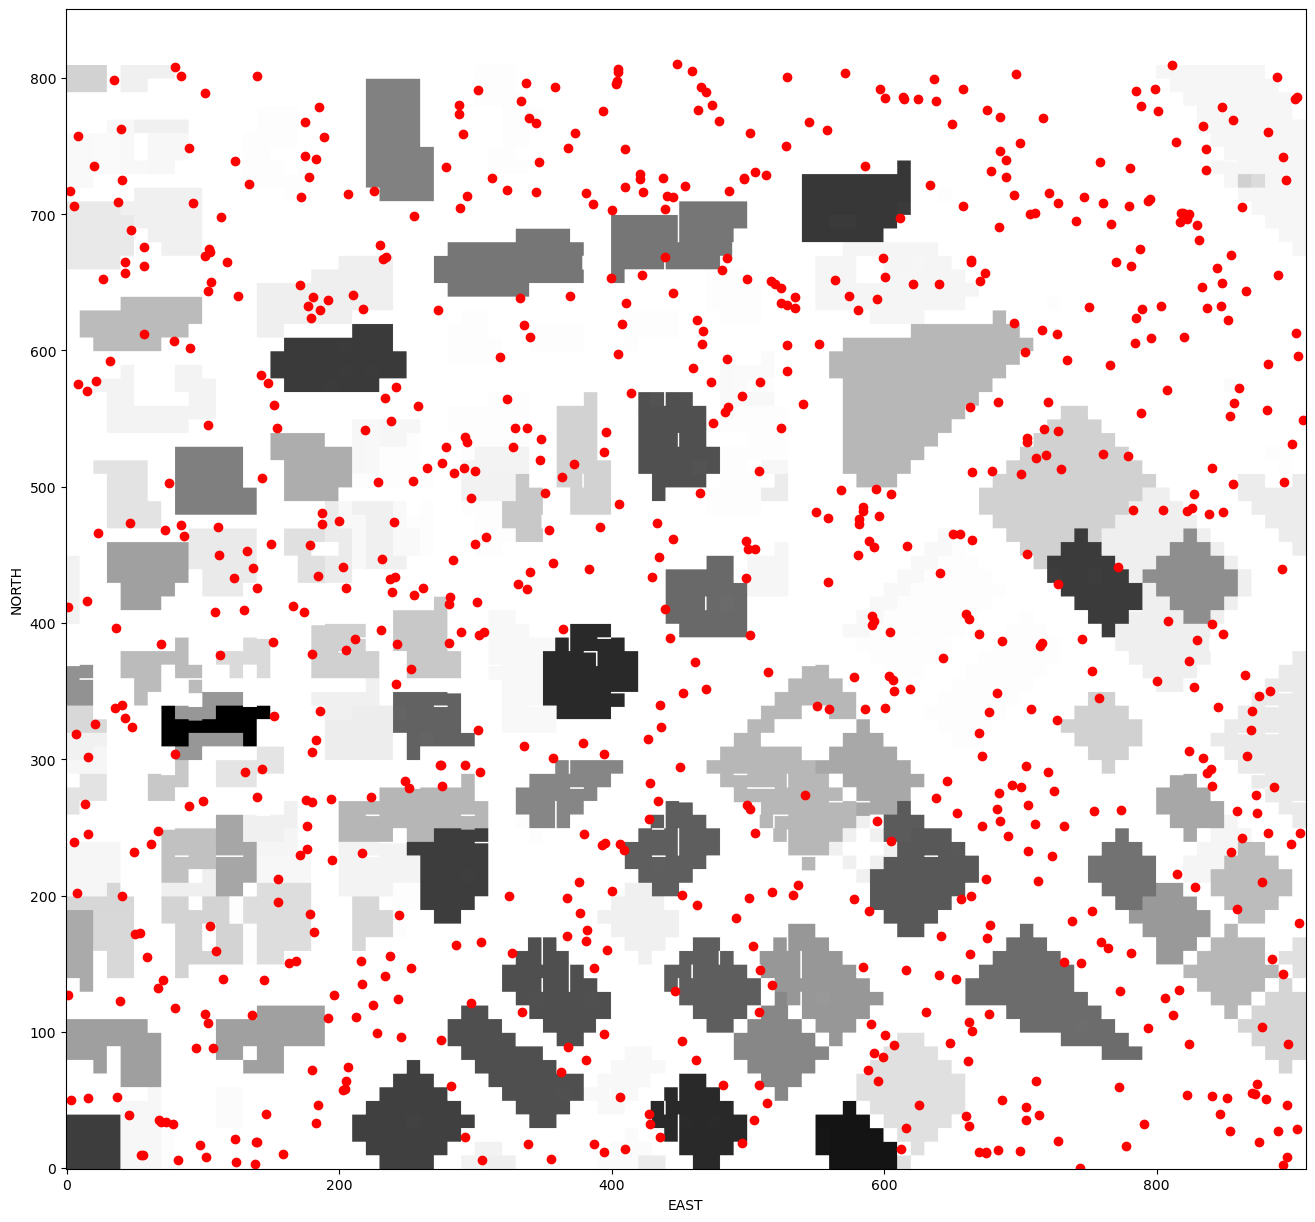

In [47]:

fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')

# draw points
all_pts = np.array(valid_points)
north_vals = all_pts[:,0]
east_vals = all_pts[:,1]
plt.scatter(east_vals, north_vals, c='red')

plt.ylabel('NORTH')
plt.xlabel('EAST')

plt.show()